<a href="https://colab.research.google.com/github/Kitagawa-Mariin/HenryPark_Python/blob/Machine_Learning/9_3_LSTM_%26_GRU_IMDBReviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

기본 순환층은 긴 시퀀스를 학습하기 어렵다. 시퀀스가 길면 길수록 순환되는 은닉 상태에 담긴 정보가 희석됨.

***Long Short-Term Memory***

단기 기억을 오래 기억하기 위해 고안됨.

시그모이드 활성화 함수를 사용. tanh 활성화 함수를 통과한 어떤 값과 곱해져서 은닉 상태를 만듬.



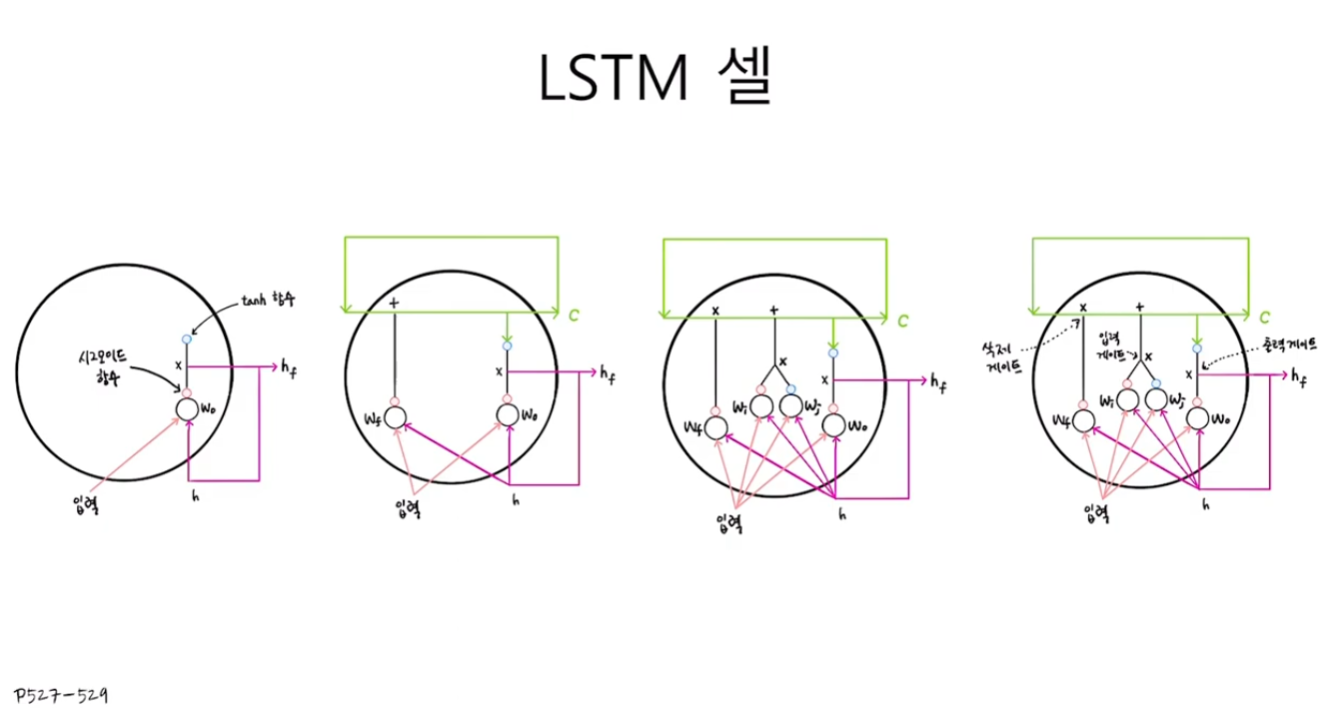

LSTM에 순환되는 2가지 상태.

h : 은닉 상태

c : 셀 상태 (다음 층으로 전달되지 않고 LSTM에서만 순환)

1. 입력과 은닉 상태를 또 다른 가중치 wf에 곱한 다음 시그모이드 함수를 통과. (왼쪽W)

2. 이전 타임스텝의 셀 상태와 곱하여 새로운 셀 상태 만듬.

3. 이 셀 상태가 오른쪽에서 tanh 함수를 통과하여 새로운 은닉 상태를 만드는데 기여.

4. 입력과 은닉 상태를 각기 다른 가중치에 곱하고, 하나는 시그모이드 함수를 통과, 다른 하나는 tanh 함수를 통과.

5. 두 결과를 곱한 후 이전 셀 상태와 더함.

삭제 게이트는 셀 상태에 있는 정보를 제거. 입력 게이트는 새로운 정보를 셀 상태에 추가. 출력 게이트를 통해서 이 셀 상태가 다음 은닉 상태로 출력.

In [ ]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = imdb.load_data(
    num_words=500
)
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42
)

17464789/17464789 [==============================] - 1s 0us/step


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)


In [ ]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 17s 46ms/step - loss: 0.6925 - accuracy: 0.5429 - val_loss: 0.6918 - val_accuracy: 0.5700
Epoch 2/100
  5/313 [..............................] - ETA: 10s - loss: 0.6911 - accuracy: 0.6187

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 15s 49ms/step - loss: 0.6903 - accuracy: 0.6108 - val_loss: 0.6886 - val_accuracy: 0.6274
Epoch 3/100
313/313 [==============================] - 17s 55ms/step - loss: 0.6824 - accuracy: 0.6583 - val_loss: 0.6710 - val_accuracy: 0.6994
Epoch 4/100
313/313 [==============================] - 15s 47ms/step - loss: 0.6312 - accuracy: 0.7020 - val_loss: 0.6078 - val_accuracy: 0.6926
Epoch 5/100
313/313 [==============================] - 14s 44ms/step - loss: 0.5923 - accuracy: 0.7111 - val_loss: 0.5835 - val_accuracy: 0.7218
Epoch 6/100
313/313 [==============================] - 14s 44ms/step - loss: 0.5688 - accuracy: 0.7347 - val_loss: 0.5623 - val_accuracy: 0.7388
Epoch 7/100
313/313 [==============================] - 14s 43ms/step - loss: 0.5474 - accuracy: 0.7505 - val_loss: 0.5425 - val_accuracy: 0.7514
Epoch 8/100
313/313 [==============================] - 15s 48ms/step - loss: 0.5270 - accuracy: 0.7626 - val_loss: 0.5244 - val_accuracy: 0.75

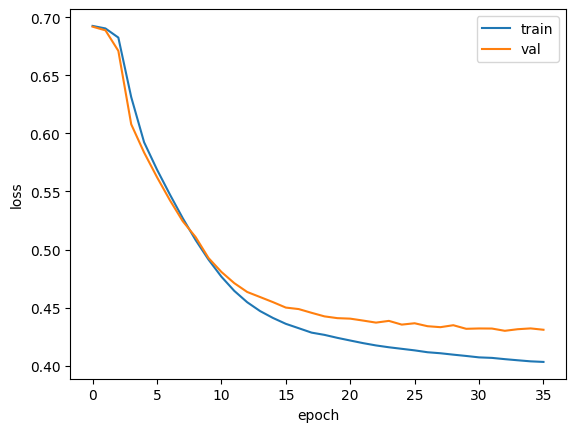

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

***Dropout & Recurrent_dropout***

dropout 매개변수는 셀의 입력에 드롭아웃을 적용.

recurrent_dropout은 순환되는 은닉 상태에 드롭아웃을 적용. (gpu 사용 못해서 훈련속도가 크게 느려짐.)

과대적합을 막자!!!!

In [ ]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 20s 51ms/step - loss: 0.6925 - accuracy: 0.5324 - val_loss: 0.6919 - val_accuracy: 0.5392
Epoch 2/100
  3/313 [..............................] - ETA: 11s - loss: 0.6921 - accuracy: 0.5260

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 15s 48ms/step - loss: 0.6903 - accuracy: 0.5911 - val_loss: 0.6889 - val_accuracy: 0.5946
Epoch 3/100
313/313 [==============================] - 14s 46ms/step - loss: 0.6838 - accuracy: 0.6370 - val_loss: 0.6771 - val_accuracy: 0.6804
Epoch 4/100
313/313 [==============================] - 14s 46ms/step - loss: 0.6482 - accuracy: 0.6969 - val_loss: 0.6099 - val_accuracy: 0.7096
Epoch 5/100
313/313 [==============================] - 14s 46ms/step - loss: 0.5952 - accuracy: 0.7090 - val_loss: 0.5856 - val_accuracy: 0.7180
Epoch 6/100
313/313 [==============================] - 14s 46ms/step - loss: 0.5773 - accuracy: 0.7247 - val_loss: 0.5675 - val_accuracy: 0.7390
Epoch 7/100
313/313 [==============================] - 16s 51ms/step - loss: 0.5608 - accuracy: 0.7374 - val_loss: 0.5563 - val_accuracy: 0.7412
Epoch 8/100
313/313 [==============================] - 16s 51ms/step - loss: 0.5452 - accuracy: 0.7495 - val_loss: 0.5380 - val_accuracy: 0.76

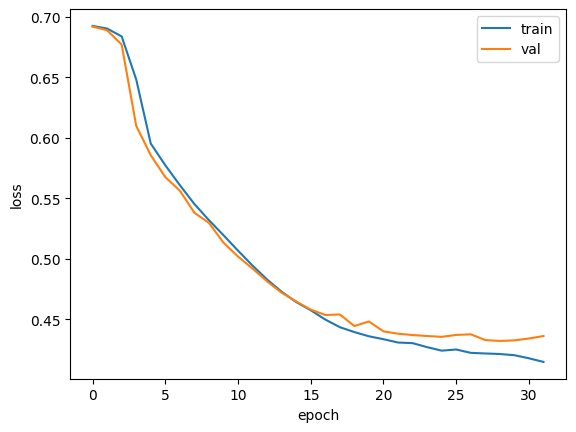

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

2개의 층을 연결하기

순환층의 은닉 상태는 샘플의 마지막 타임스텝에 댛대한 은닉 상태만 다음 층으로 전달함.

순환층을 쌓게 되면 **모든 순환층에 순차 데이터가 필요**합니다.

**앞쪽의 순환층**이 **모든 타임스텝에 대한 은닉 상태를 출력**해야함.

In [ ]:
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True)) #모든 타임스텝의 은닉 상태를 출력.
#마지막을 제외한 다른 모든 순환층에서 return_sequences=True
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_4 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_5 (LSTM)               (None, 8)                 544       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9353 (36.54 KB)
Trainable params: 9353 (36.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model3.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 34s 90ms/step - loss: 0.6930 - accuracy: 0.5103 - val_loss: 0.6926 - val_accuracy: 0.5136
Epoch 2/100
  1/313 [..............................] - ETA: 34s - loss: 0.6918 - accuracy: 0.5312

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 26s 83ms/step - loss: 0.6919 - accuracy: 0.5683 - val_loss: 0.6908 - val_accuracy: 0.5880
Epoch 3/100
313/313 [==============================] - 28s 91ms/step - loss: 0.6870 - accuracy: 0.6199 - val_loss: 0.6794 - val_accuracy: 0.6612
Epoch 4/100
313/313 [==============================] - 29s 92ms/step - loss: 0.6507 - accuracy: 0.6655 - val_loss: 0.6105 - val_accuracy: 0.6918
Epoch 5/100
313/313 [==============================] - 28s 90ms/step - loss: 0.5871 - accuracy: 0.7086 - val_loss: 0.5624 - val_accuracy: 0.7290
Epoch 6/100
313/313 [==============================] - 28s 89ms/step - loss: 0.5549 - accuracy: 0.7304 - val_loss: 0.5379 - val_accuracy: 0.7454
Epoch 7/100
313/313 [==============================] - 27s 87ms/step - loss: 0.5310 - accuracy: 0.7464 - val_loss: 0.5233 - val_accuracy: 0.7484
Epoch 8/100
313/313 [==============================] - 27s 85ms/step - loss: 0.5133 - accuracy: 0.7590 - val_loss: 0.5015 - val_accuracy: 0.76

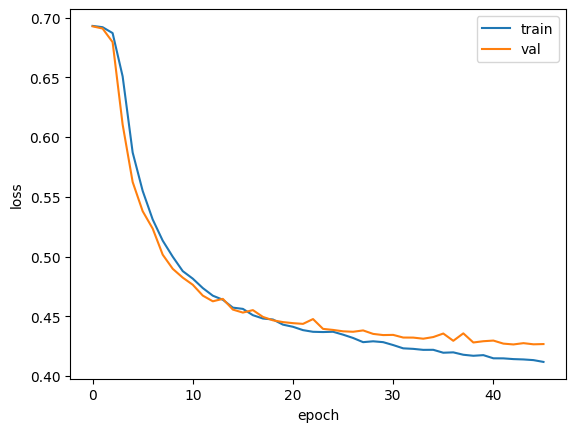

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

***Gated Recurrent Unit GRU***

LSTM을 간소화한 버전. 셀 상태를 계산하지 않고 은닉 상태 하나만 포함하고 있음.

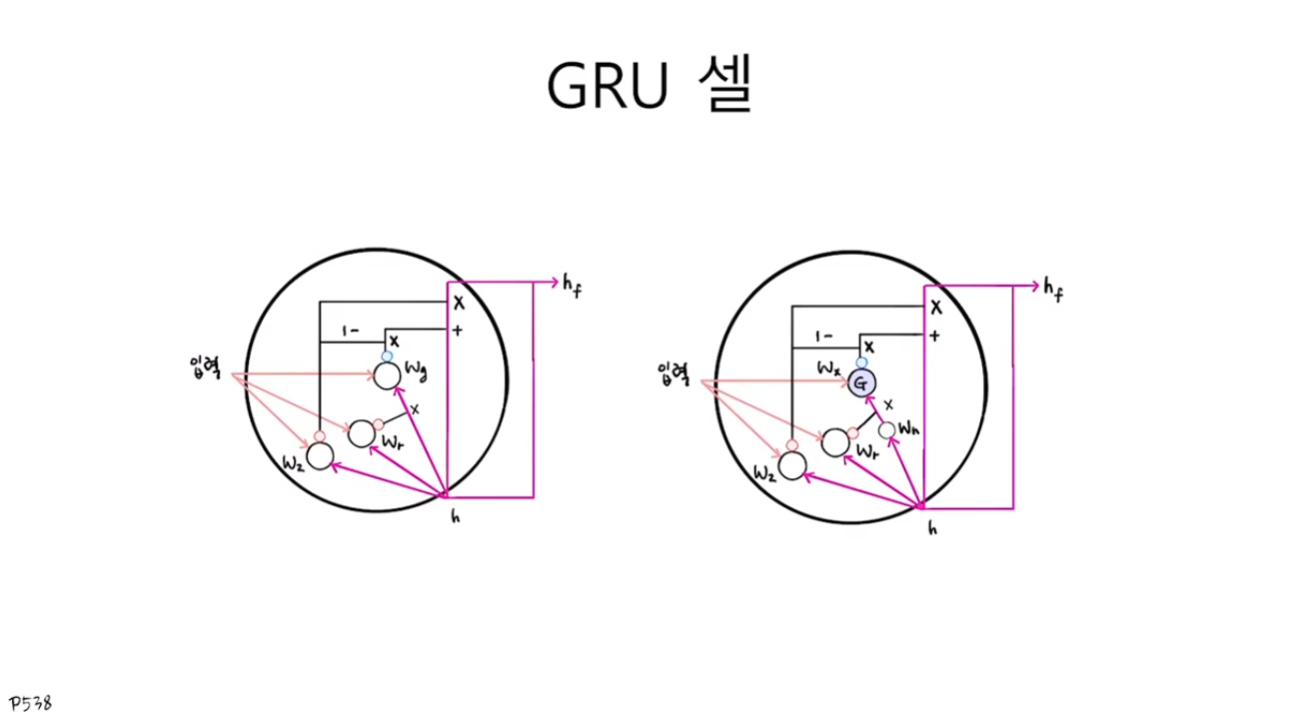

작은 셀 3개. 2개는 시그모이드 활성화 함수. 하나는 tanh 활성화 함수.

Wz를 사용하는 셀의 출력이 은닉 상태에 바로 곱해져 삭제 게이트 역할을 수행.

출력을 1에서 뺀 다음에 가장 오른쪽 Wg를 사용하는 셀의 출력에 곱함.

입력되는 정보를 제어하는 역할을 수행.

가운데 Wr을 사용하는 셀에서 출력된 값은 Wg 셀이 사용할 은닉 상태의 정보를 제어.

GRU셀은 LSTM보다 가중치가 적기 때문에 계산량이 적지만 LSTM 못지않은 좋은 성능을 냄.



In [ ]:
model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
model4.summary()
#텐서플로는 조금 다르다. 그 이유는 GPU를 잘 활용하기 위해서. 모델 파라미터 개수가 달라질 수 있음. 보통은 전자.

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru (GRU)                   (None, 8)                 624       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8633 (33.72 KB)
Trainable params: 8633 (33.72 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model4.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 19s 53ms/step - loss: 0.6918 - accuracy: 0.5246 - val_loss: 0.6907 - val_accuracy: 0.5424
Epoch 2/100
  2/313 [..............................] - ETA: 20s - loss: 0.6908 - accuracy: 0.5547

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 25s 79ms/step - loss: 0.6887 - accuracy: 0.5610 - val_loss: 0.6873 - val_accuracy: 0.5702
Epoch 3/100
313/313 [==============================] - 22s 70ms/step - loss: 0.6840 - accuracy: 0.5877 - val_loss: 0.6819 - val_accuracy: 0.5870
Epoch 4/100
313/313 [==============================] - 19s 60ms/step - loss: 0.6765 - accuracy: 0.6077 - val_loss: 0.6733 - val_accuracy: 0.6084
Epoch 5/100
313/313 [==============================] - 15s 49ms/step - loss: 0.6648 - accuracy: 0.6241 - val_loss: 0.6597 - val_accuracy: 0.6250
Epoch 6/100
313/313 [==============================] - 15s 48ms/step - loss: 0.6460 - accuracy: 0.6482 - val_loss: 0.6378 - val_accuracy: 0.6498
Epoch 7/100
313/313 [==============================] - 15s 48ms/step - loss: 0.6148 - accuracy: 0.6764 - val_loss: 0.6003 - val_accuracy: 0.6894
Epoch 8/100
313/313 [==============================] - 16s 50ms/step - loss: 0.5571 - accuracy: 0.7168 - val_loss: 0.5324 - val_accuracy: 0.73

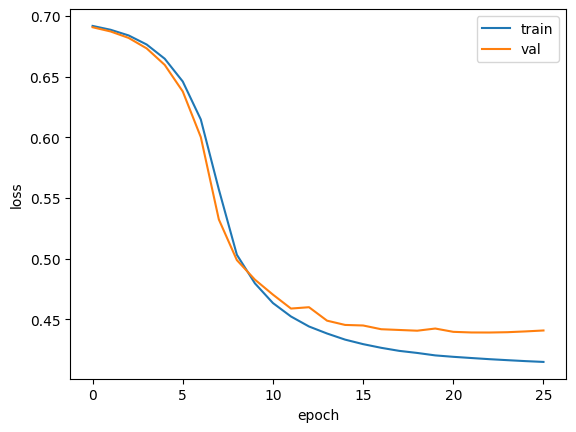

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
test_seq = pad_sequences(test_input, maxlen=100)
rnn_model = keras.models.load_model('best-2rnn-model.h5')
rnn_model.evaluate(test_seq, test_target)

782/782 [==============================] - 14s 17ms/step - loss: 0.4223 - accuracy: 0.8030


[0.42227792739868164, 0.8029599785804749]